In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('behavior.csv')
df

,user_id,ad_id,behavior_type,item_category,time,hour
0,3818035,769273,1,35830,2024/1/8,2
1,4044659,210740,1,5987,2024/1/8,23
2,3846307,701988,1,570,2024/1/8,17
3,4225075,696487,1,46141,2024/1/8,21
4,3668163,203207,1,1273,2024/1/8,6
...,...,...,...,...,...,...
199785,4045155,293868,4,44201,2024/1/18,23
199786,4138787,84663,4,29398,2024/1/18,15
199787,4081747,371179,4,6078,2024/1/18,17
199788,3571059,215886,4,30899,2024/1/18,18


In [3]:
df.dtypes

user_id           int64
ad_id             int64
behavior_type     int64
item_category     int64
time             object
hour              int64
dtype: object

In [4]:
!pip install matplotlib

In [5]:
!python.exe -m pip install --upgrade pip

In [6]:
df['time'] = pd.to_datetime(df['time'])

In [7]:
df_first_occurrence = df.groupby('user_id')['time'].min().reset_index()
df_first_occurrence

,user_id,time
0,3443267,2024-01-12
1,3443283,2024-01-14
2,3443299,2024-01-14
3,3443315,2024-01-12
4,3443331,2024-01-10
...,...,...
49995,4243187,2024-01-12
49996,4243203,2024-01-08
49997,4243219,2024-01-17
49998,4243235,2024-01-10


In [8]:
df_first_occurrence['date'] = df_first_occurrence['time'].dt.date

In [9]:
daily_new_users = df_first_occurrence.groupby('date').size()
daily_new_users

date
2024-01-08    6877
2024-01-09    6454
2024-01-10    5655
2024-01-11    5334
2024-01-12    4852
2024-01-13    4447
2024-01-14    3878
2024-01-15    3579
2024-01-16    3260
2024-01-17    3007
2024-01-18    2657
dtype: int64

In [10]:
import matplotlib.pyplot as plt

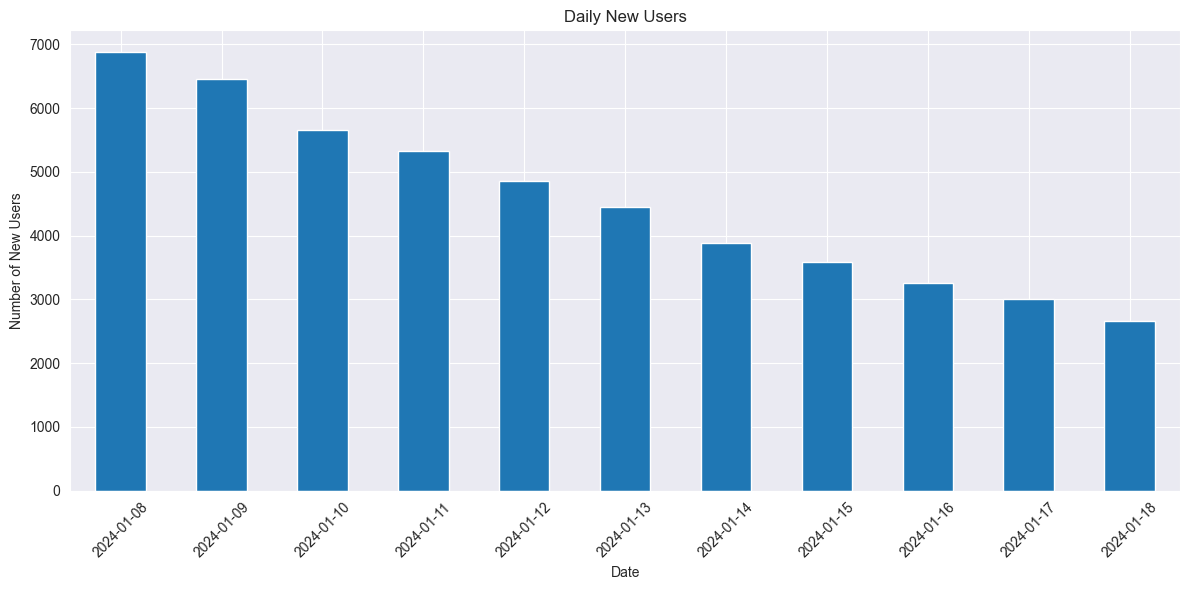

In [11]:
plt.figure(figsize=(12, 6))
daily_new_users.plot(kind='bar')
plt.title('Daily New Users')
plt.xlabel('Date')
plt.ylabel('Number of New Users')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
behavior_map = {1: 'Click', 2: 'Collection', 3: 'Repurchase', 4: 'Purchase'}
df['behavior_description'] = df['behavior_type'].map(behavior_map)
df['behavior_description']

0            Click
1            Click
2            Click
3            Click
4            Click
            ...   
199785    Purchase
199786    Purchase
199787    Purchase
199788    Purchase
199789    Purchase
Name: behavior_description, Length: 199790, dtype: object

In [13]:
funnel_counts = df.groupby('behavior_description')['user_id'].nunique()
funnel_counts

behavior_description
Click         50000
Collection    17368
Purchase      37518
Repurchase    37302
Name: user_id, dtype: int64

In [14]:
funnel_counts = funnel_counts.reindex(['Click', 'Collection', 'Repurchase', 'Purchase'])
funnel_counts

behavior_description
Click         50000
Collection    17368
Repurchase    37302
Purchase      37518
Name: user_id, dtype: int64

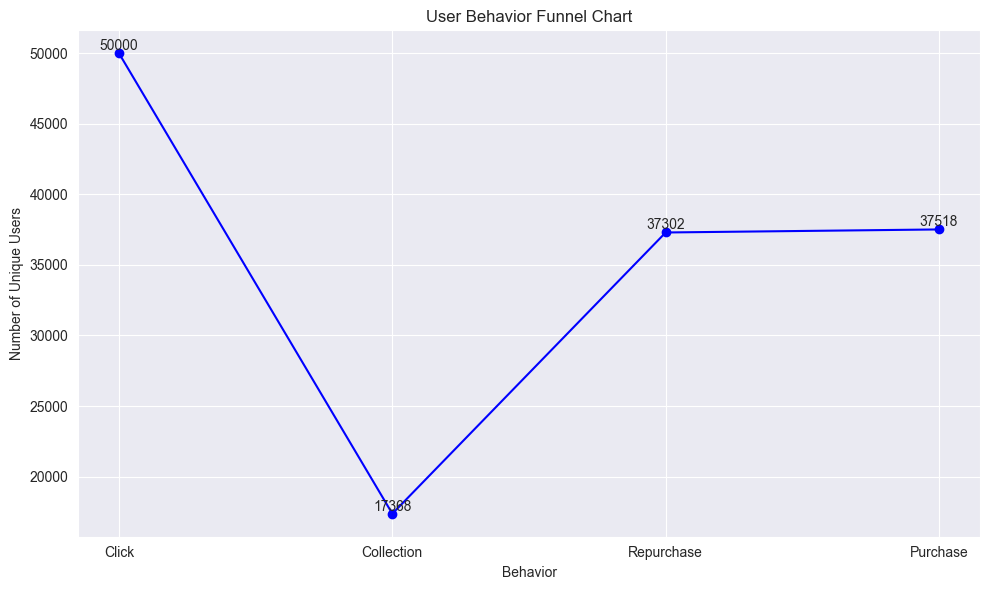

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(funnel_counts.index, funnel_counts.values, marker='o', linestyle='-', color='b')
plt.title('User Behavior Funnel Chart')
plt.xlabel('Behavior')
plt.ylabel('Number of Unique Users')
plt.grid(True)
plt.tight_layout()
for i, count in enumerate(funnel_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

In [16]:
data = pd.read_csv('behavior.csv')
data['time'] = pd.to_datetime(data['time'])
data['hour'] = data['hour'].astype(int)
data['datetime'] = data['time'] + pd.to_timedelta(data['hour'], unit='h')

In [17]:
data['date'] = data['datetime'].dt.date

In [18]:
user_per_day = data.groupby('date')['user_id'].unique()
user_per_day

date
2024-01-08    [3818035, 4044659, 3846307, 4225075, 3668163, ...
2024-01-09    [3600547, 3764675, 3951411, 3532947, 3769059, ...
2024-01-10    [3965299, 4175331, 4236019, 4039539, 4054163, ...
2024-01-11    [3835891, 4156083, 3940339, 4159203, 3965811, ...
2024-01-12    [3872915, 4211283, 3572003, 3566819, 3721155, ...
2024-01-13    [4164835, 4037299, 3527747, 3746387, 3605075, ...
2024-01-14    [3789091, 3450947, 3857267, 4158531, 3539507, ...
2024-01-15    [3596931, 4149011, 3879427, 4213795, 4230291, ...
2024-01-16    [3566803, 3751843, 3993731, 3996403, 3990499, ...
2024-01-17    [4240899, 3621875, 3780579, 3735859, 3981507, ...
2024-01-18    [3567971, 4060195, 3898451, 3742419, 3674691, ...
Name: user_id, dtype: object

In [19]:
dates = sorted(user_per_day.index)
dates

[datetime.date(2024, 1, 8),
 datetime.date(2024, 1, 9),
 datetime.date(2024, 1, 10),
 datetime.date(2024, 1, 11),
 datetime.date(2024, 1, 12),
 datetime.date(2024, 1, 13),
 datetime.date(2024, 1, 14),
 datetime.date(2024, 1, 15),
 datetime.date(2024, 1, 16),
 datetime.date(2024, 1, 17),
 datetime.date(2024, 1, 18)]

In [20]:
retention = pd.DataFrame(index=dates, columns=dates)
retention

,2024-01-08,2024-01-09,2024-01-10,2024-01-11,2024-01-12,2024-01-13,2024-01-14,2024-01-15,2024-01-16,2024-01-17,2024-01-18
2024-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
for i, date in enumerate(dates):
    initial_users = set(user_per_day[date])
    for j in range(i, len(dates)):
        next_date = dates[j]
        returning_users = set(user_per_day[next_date])
        retention.at[date, next_date] = len(returning_users & initial_users)
        
        
retention = retention.astype(float)

In [22]:
!pip install seaborn

In [23]:
import seaborn as sns

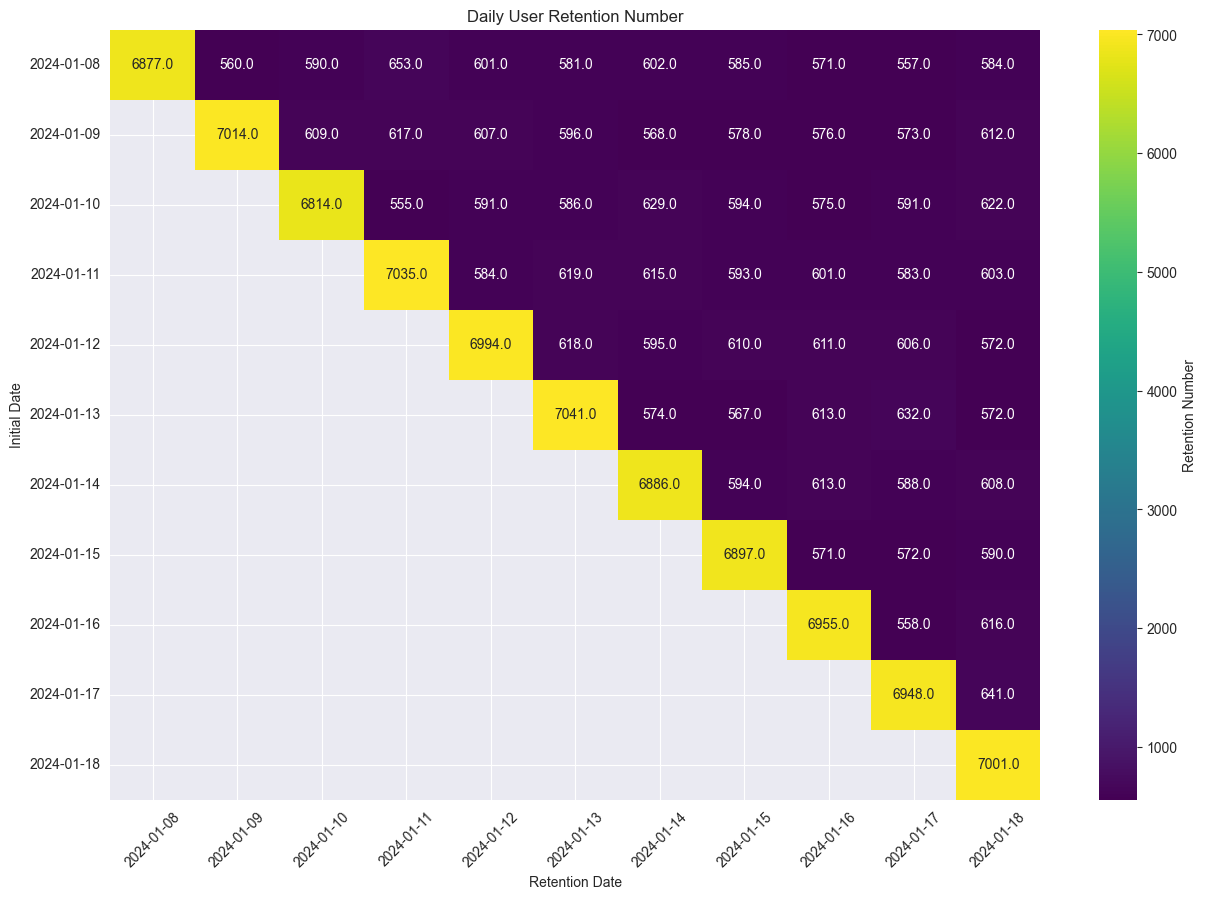

In [25]:
plt.figure(figsize=(15, 10))
sns.heatmap(retention, annot=True, fmt=".1f", cmap="viridis", cbar_kws={'label': 'Retention Number'})
plt.title('Daily User Retention Number')
plt.xlabel('Retention Date')
plt.ylabel('Initial Date')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [26]:
for i, date in enumerate(dates):
    initial_users = set(user_per_day[date])
    for j in range(i, len(dates)):
        next_date = dates[j]
        returning_users = set(user_per_day[next_date])
        retention_rate = len(returning_users & initial_users) / len(initial_users) if len(initial_users) > 0 else 0
        retention.at[date, next_date] = retention_rate * 100
        
retention = retention.astype(float)

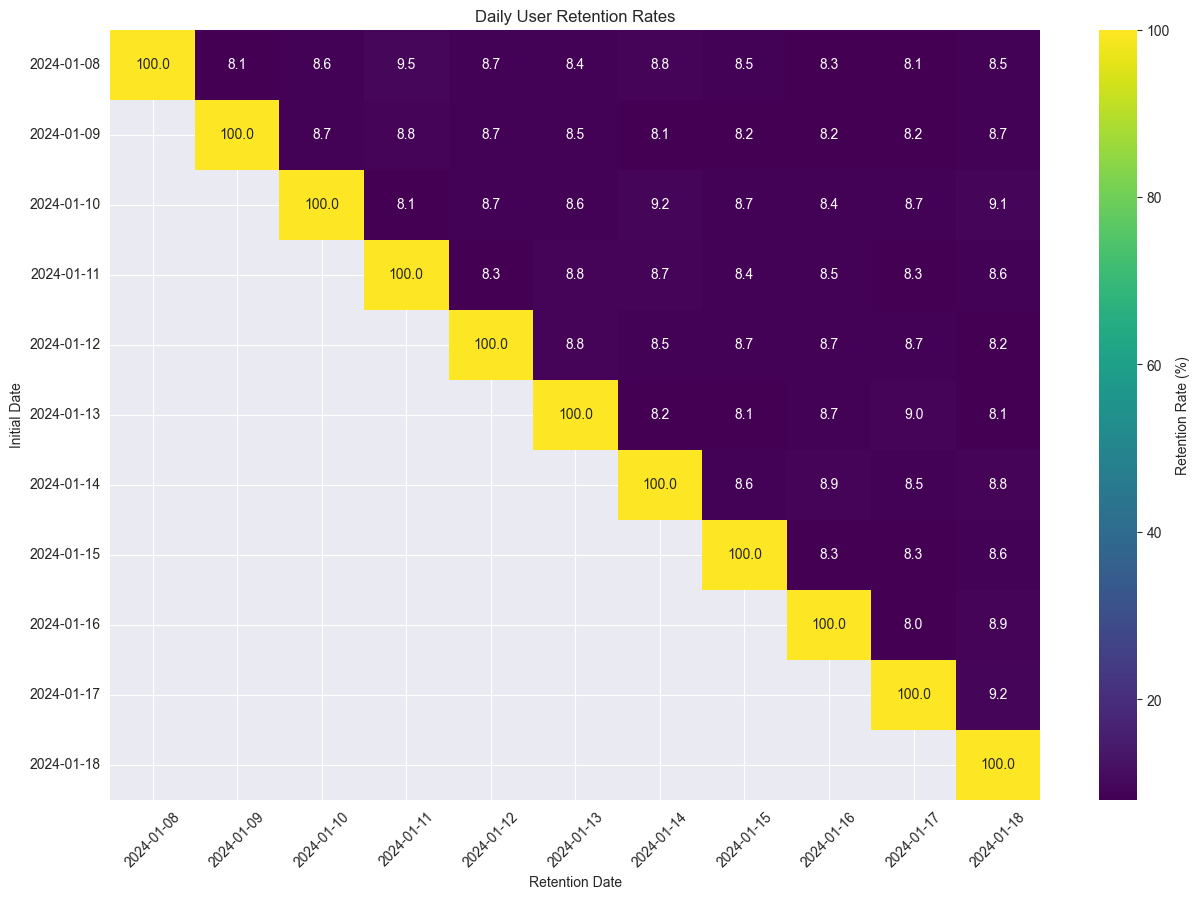

In [27]:
plt.figure(figsize=(15, 10))
sns.heatmap(retention, annot=True, fmt=".1f", cmap="viridis", cbar_kws={'label': 'Retention Rate (%)'})
plt.title('Daily User Retention Rates')
plt.xlabel('Retention Date')
plt.ylabel('Initial Date')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [28]:
purchase_data = df[df['behavior_type'] == 3]

In [29]:
user_purchase_counts = purchase_data['user_id'].value_counts()

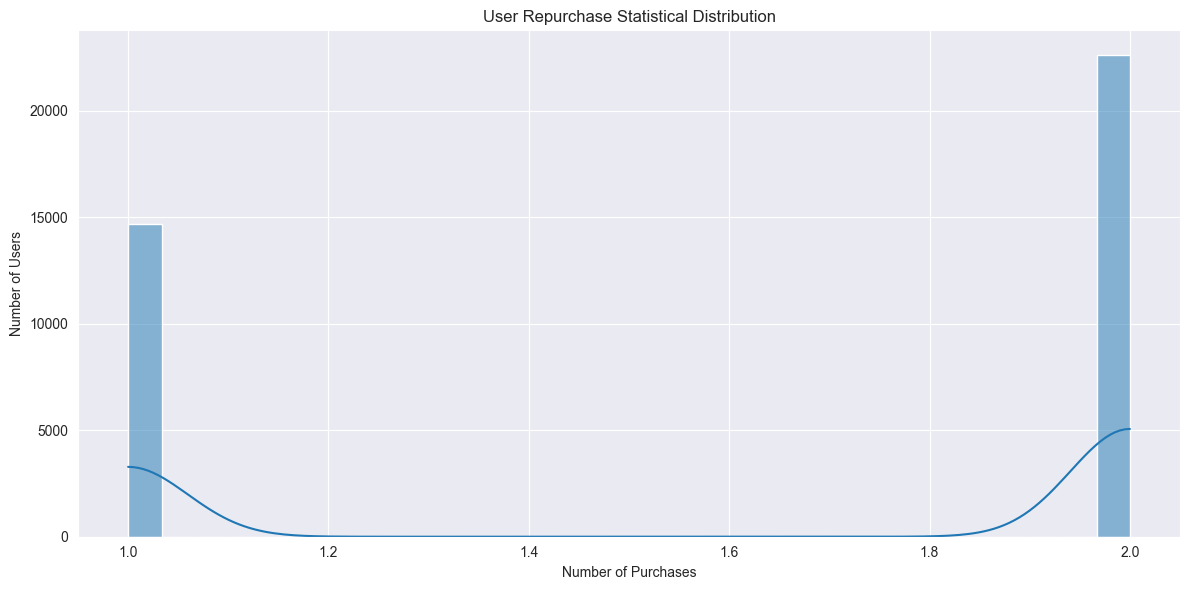

In [30]:
plt.figure(figsize=(12, 6))
sns.histplot(user_purchase_counts, bins=30, kde=True)
plt.title('User Repurchase Statistical Distribution')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Users')
plt.grid(True)
plt.tight_layout()

plt.show()

In [31]:
df['day'] = df['time'].dt.day
df['month'] = df['time'].dt.month
df['year'] = df['time'].dt.year
df['datetime'] = df['time'] + pd.to_timedelta(df['hour'], unit='h')

In [32]:
df['date'] = df['time'].dt.date
daily_behavior = df.groupby(['date', 'behavior_type']).size().unstack(fill_value=0)
daily_behavior.columns = ['clicks', 'collections', 'repurchases', 'purchases']
daily_behavior

,clicks,collections,repurchases,purchases
date,,,,
2024-01-08,7186,1660,5446,3532
2024-01-09,7320,1970,5380,3665
2024-01-10,7106,1157,5917,3518
2024-01-11,7359,1477,5933,3766
2024-01-12,7341,1426,5870,3615
2024-01-13,7372,2148,5232,3650
2024-01-14,7224,1840,5260,3499
2024-01-15,7213,1951,5275,3616
2024-01-16,7256,1120,6216,3622


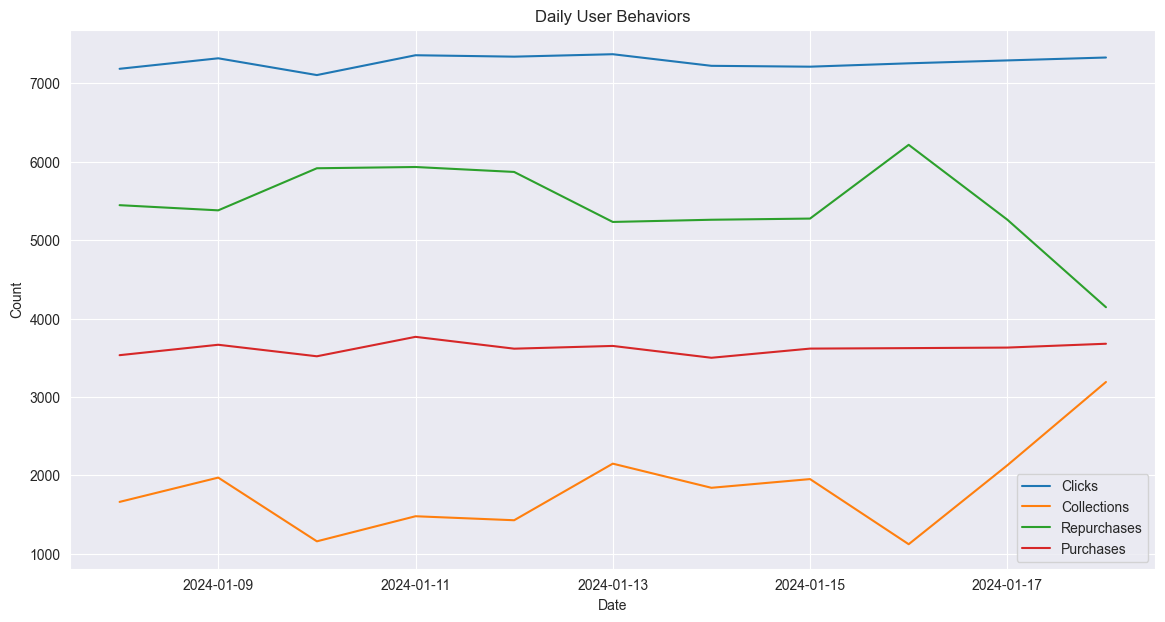

In [33]:
plt.figure(figsize=(14, 7))
plt.plot(daily_behavior.index, daily_behavior['clicks'], label='Clicks')
plt.plot(daily_behavior.index, daily_behavior['collections'], label='Collections')
plt.plot(daily_behavior.index, daily_behavior['repurchases'], label='Repurchases')
plt.plot(daily_behavior.index, daily_behavior['purchases'], label='Purchases')

plt.title('Daily User Behaviors')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()

plt.show()

In [34]:
df['hour'] = df['hour'].astype(int)
hourly_behavior = df.groupby(['hour', 'behavior_type']).size().unstack(fill_value=0)
hourly_behavior.columns = ['clicks', 'collections', 'repurchases', 'purchases']
hourly_behavior

,clicks,collections,repurchases,purchases
hour,,,,
0,4344,1019,3217,2139
1,3459,855,2577,1660
2,2787,703,2157,1425
3,2114,548,1586,1037
4,1495,409,1121,755
5,1128,287,875,559
6,903,216,626,428
7,728,188,582,390
8,756,182,562,387


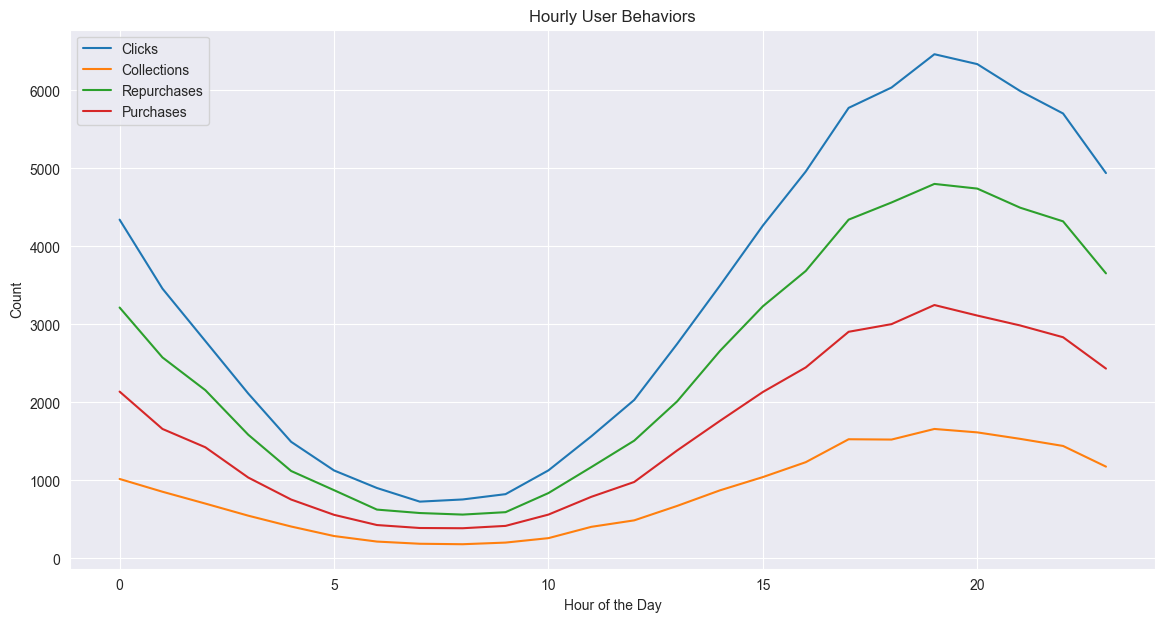

In [35]:
plt.figure(figsize=(14, 7))
plt.plot(hourly_behavior.index, hourly_behavior['clicks'], label='Clicks')
plt.plot(hourly_behavior.index, hourly_behavior['collections'], label='Collections')
plt.plot(hourly_behavior.index, hourly_behavior['repurchases'], label='Repurchases')
plt.plot(hourly_behavior.index, hourly_behavior['purchases'], label='Purchases')

plt.title('Hourly User Behaviors')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.legend()

plt.show()

In [36]:
last_interaction = df.groupby('user_id')['datetime'].max().reset_index()
last_interaction.columns = ['user_id', 'last_interaction']
last_interaction

,user_id,last_interaction
0,3443267,2024-01-12 18:00:00
1,3443283,2024-01-14 08:00:00
2,3443299,2024-01-14 23:00:00
3,3443315,2024-01-16 19:00:00
4,3443331,2024-01-10 13:00:00
...,...,...
49995,4243187,2024-01-15 17:00:00
49996,4243203,2024-01-14 14:00:00
49997,4243219,2024-01-17 00:00:00
49998,4243235,2024-01-14 21:00:00


In [37]:
current_date = df['datetime'].max()
last_interaction['recency'] = (current_date - last_interaction['last_interaction']).dt.days

In [38]:
frequency = df.groupby('user_id')['datetime'].count().reset_index()
frequency.columns = ['user_id', 'frequency']
frequency

,user_id,frequency
0,3443267,3
1,3443283,2
2,3443299,2
3,3443315,3
4,3443331,2
...,...,...
49995,4243187,5
49996,4243203,5
49997,4243219,3
49998,4243235,6


In [39]:
monetary = df[df['behavior_type'].isin([3, 4])].groupby('user_id')['behavior_type'].count().reset_index()
monetary.columns = ['user_id', 'monetary']
monetary

,user_id,monetary
0,3443267,1
1,3443283,1
2,3443299,1
3,3443315,1
4,3443331,1
...,...,...
47221,4243187,3
47222,4243203,2
47223,4243219,2
47224,4243235,4


In [40]:
rmf = last_interaction.merge(frequency, on='user_id').merge(monetary, on='user_id', how='left')
rmf['monetary'] = rmf['monetary'].fillna(0)
rmf['R_score'] = pd.qcut(rmf['recency'], 4, labels=[4, 3, 2, 1])
rmf['F_score'] = pd.qcut(rmf['frequency'].rank(method='first'), 4, labels=[1, 2, 3, 4])
rmf['M_score'] = pd.qcut(rmf['monetary'].rank(method='first'), 4, labels=[1, 2, 3, 4])

In [41]:
rmf['RMF_score'] = rmf['R_score'].astype(str) + rmf['F_score'].astype(str) + rmf['M_score'].astype(str)

In [42]:
def classify_user(rmf_score):
    if rmf_score in ['444', '443', '434', '433']:
        return 'Top Customers'
    elif rmf_score in ['344', '343', '334', '333', '244', '243']:
        return 'High Value Customers'
    elif rmf_score in ['144', '143', '134', '133', '124', '123']:
        return 'Medium Value Customers'
    else:
        return 'Low Value Customers'

rmf['user_value'] = rmf['RMF_score'].apply(classify_user)
rmf

,user_id,last_interaction,recency,frequency,monetary,R_score,F_score,M_score,RMF_score,user_value
0,3443267,2024-01-12 18:00:00,6,3,1.0,2,1,1,211,Low Value Customers
1,3443283,2024-01-14 08:00:00,4,2,1.0,3,1,1,311,Low Value Customers
2,3443299,2024-01-14 23:00:00,4,2,1.0,3,1,1,311,Low Value Customers
3,3443315,2024-01-16 19:00:00,2,3,1.0,3,1,1,311,Low Value Customers
4,3443331,2024-01-10 13:00:00,8,2,1.0,1,1,1,111,Low Value Customers
...,...,...,...,...,...,...,...,...,...,...
49995,4243187,2024-01-15 17:00:00,3,5,3.0,3,4,4,344,High Value Customers
49996,4243203,2024-01-14 14:00:00,4,5,2.0,3,4,3,343,High Value Customers
49997,4243219,2024-01-17 00:00:00,1,3,2.0,4,2,3,423,Low Value Customers
49998,4243235,2024-01-14 21:00:00,4,6,4.0,3,4,4,344,High Value Customers


C:\Users\hsc88\AppData\Local\Temp\ipykernel_2344\2551295646.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


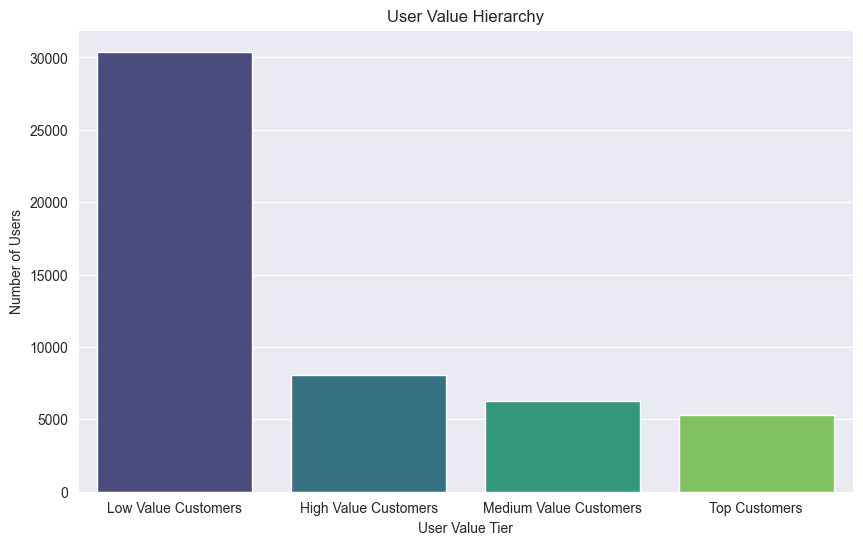

In [43]:
value_counts = rmf['user_value'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')
plt.title('User Value Hierarchy')
plt.xlabel('User Value Tier')
plt.ylabel('Number of Users')
plt.show()

In [44]:
behavior_counts = df['behavior_type'].value_counts().sort_index()
behavior_counts.index = ['Clicks', 'Collections', 'Repurchases', 'Purchases']

In [45]:
daily_behavior = df.groupby([df['datetime'].dt.date, 'behavior_type']).size().unstack(fill_value=0)
daily_behavior.columns = ['Clicks', 'Collections', 'Repurchases', 'Purchases']

C:\Users\hsc88\AppData\Local\Temp\ipykernel_2344\2124287508.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=behavior_counts.index, y=behavior_counts.values, palette='viridis')


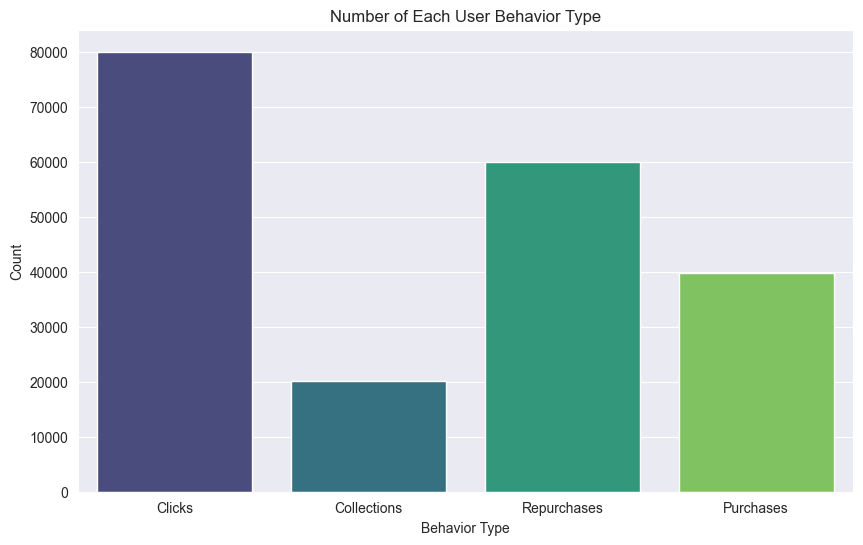

In [46]:
plt.figure(figsize=(10, 6))
sns.barplot(x=behavior_counts.index, y=behavior_counts.values, palette='viridis')
plt.title('Number of Each User Behavior Type')
plt.xlabel('Behavior Type')
plt.ylabel('Count')
plt.show()

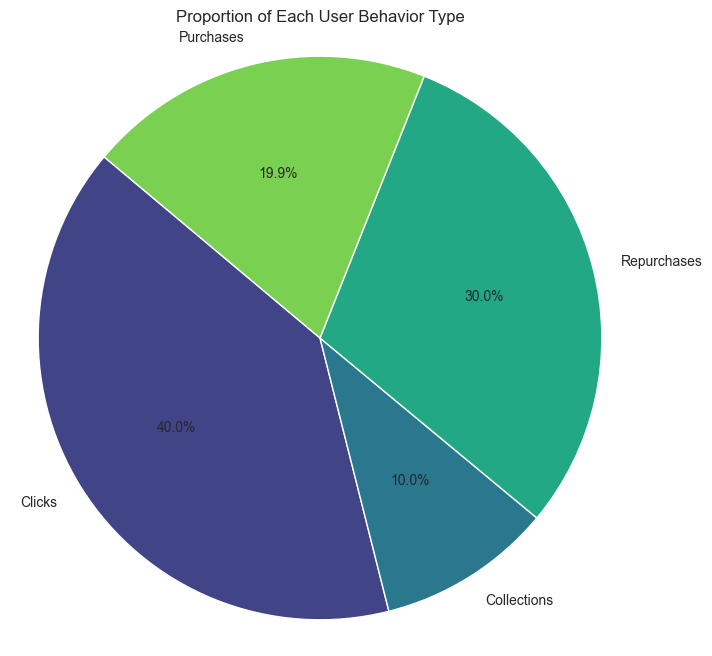

In [47]:
plt.figure(figsize=(8, 8))
plt.pie(behavior_counts, labels=behavior_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(behavior_counts)))
plt.title('Proportion of Each User Behavior Type')
plt.axis('equal')  
plt.show()

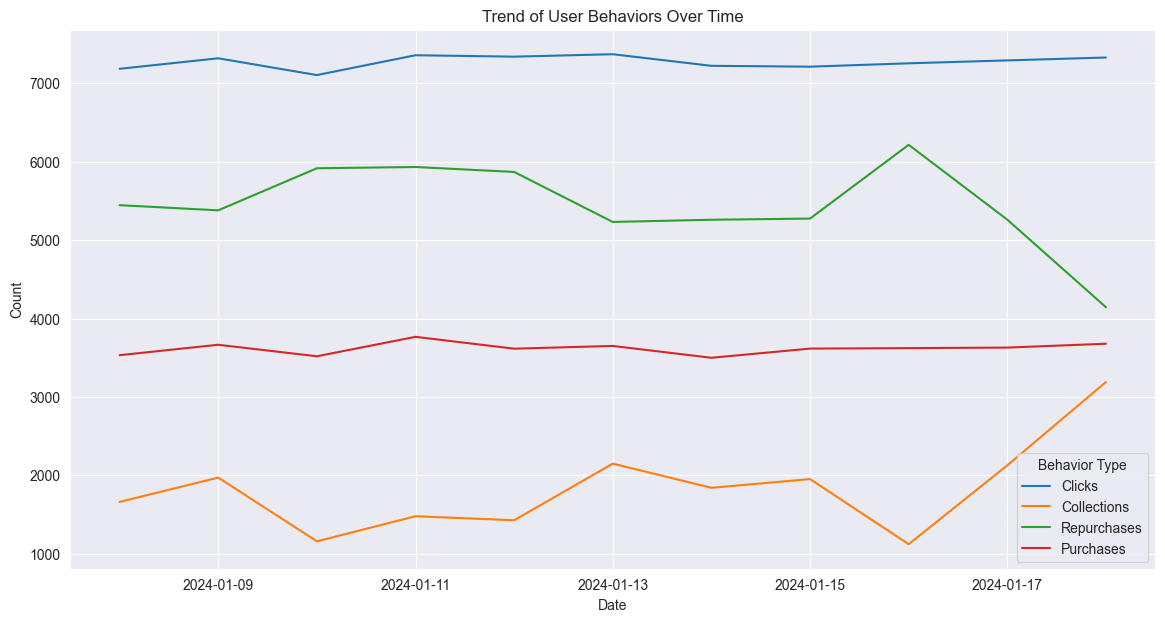

In [48]:
plt.figure(figsize=(14, 7))
for column in daily_behavior.columns:
    plt.plot(daily_behavior.index, daily_behavior[column], label=column)

plt.title('Trend of User Behaviors Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend(title='Behavior Type')
plt.show()

In [49]:
purchase_data = df[df['behavior_type'] == 4]
purchase_frequency = purchase_data['item_category'].value_counts().reset_index()
purchase_frequency.columns = ['item_category', 'purchase_count']

C:\Users\hsc88\AppData\Local\Temp\ipykernel_2344\1540190680.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='purchase_count', y='item_category', data=purchase_frequency, palette='viridis')


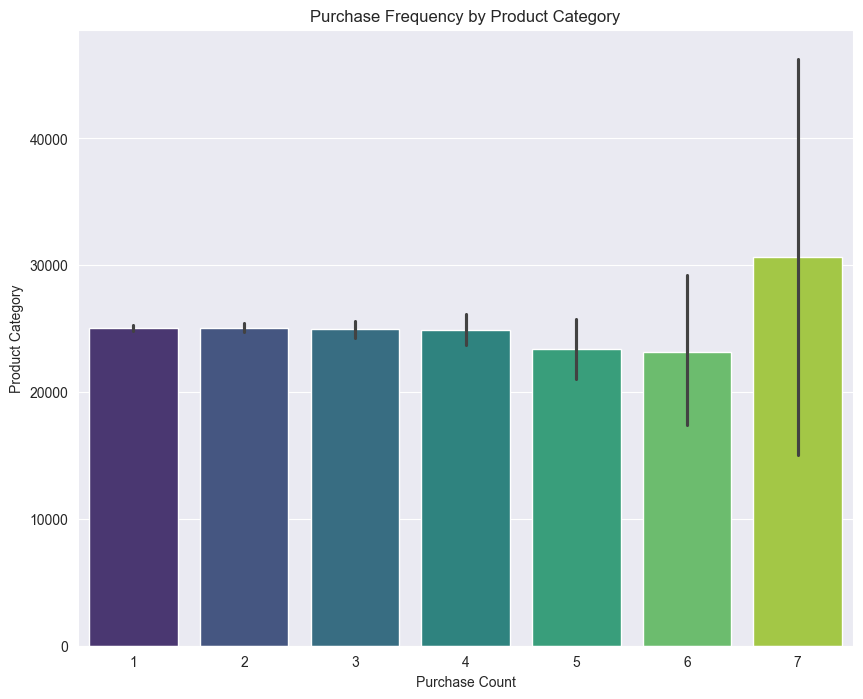

In [50]:
plt.figure(figsize=(10, 8))
sns.barplot(x='purchase_count', y='item_category', data=purchase_frequency, palette='viridis')
plt.title('Purchase Frequency by Product Category')
plt.xlabel('Purchase Count')
plt.ylabel('Product Category')
plt.show()